### Download das Tabelas de IRS de Portugal 
#### Fonte: https://info.portaldasfinancas.gov.pt/pt/apoio_contribuinte/tabela_ret_doclib/Pages/default.aspx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
excel_file = 'Tabelas_RF_Continente_2022.xlsx'
quantity_rows = 14 # max 35
raw_tax_sheet = pd.read_excel(
    excel_file,
    #sheetname="Trabalho_Dependente",
    #index_col=0,
    skiprows = 9,
    usecols = 'B:C',
    nrows = quantity_rows
)

raw_tax_sheet.head()


,Unnamed: 1,0
0,710,0.000
1,720,0.018
2,740,0.045
3,754,0.063
4,814,0.079


In [3]:
df = raw_tax_sheet.rename( columns={'Unnamed: 1': 'gross_income', 0: 'tax_percentage'} )
print(df.head())
df['net_income'] = df.apply(lambda row: row[0] - (row[0] * row[1]), axis=1 )

print(df.dtypes)
df

   gross_income  tax_percentage
0           710           0.000
1           720           0.018
2           740           0.045
3           754           0.063
4           814           0.079
gross_income        int64
tax_percentage    float64
net_income        float64
dtype: object


,gross_income,tax_percentage,net_income
0,710,0.000,710.000
1,720,0.018,707.040
2,740,0.045,706.700
3,754,0.063,706.498
4,814,0.079,749.694
5,922,0.101,828.878
6,1005,0.113,891.435
7,1065,0.121,936.135
8,1143,0.131,993.267
9,1225,0.141,1052.275


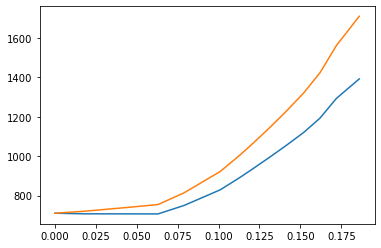

In [4]:
plt.plot(df['tax_percentage'].values, df['net_income'].values)


brute_income = []
# for count in range( quantity_rows ):
#     brute_income.append(count*722) #125
#plt.plot(df['tax_percentage'].values, brute_income)
plt.plot(df['tax_percentage'].values, df['gross_income'])